<a href="https://colab.research.google.com/github/Aria011/Twitter-validation/blob/main/Twitter_validation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **TWITTER VALIDATION**




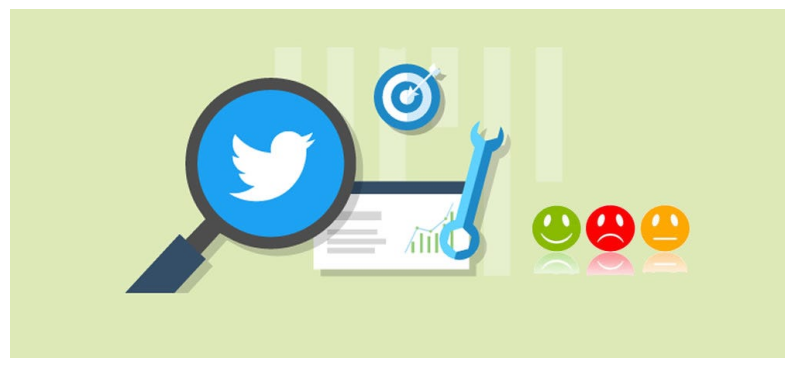

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer



In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:


df=pd.read_csv('/content/drive/MyDrive/Datasets/twitter_validation.csv',
                         names=['ID', 'Source','Target','Review'])
df

,ID,Source,Target,Review
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.head()

,ID,Source,Target,Review
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
df.tail()

,ID,Source,Target,Review
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [ ]:
df.isna().sum()

ID        0
Source    0
Target    0
Review    0
dtype: int64

In [ ]:
df.dtypes

ID         int64
Source    object
Target    object
Review    object
dtype: object

In [ ]:
df['Source'].value_counts()

Source
RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                            

<Axes: xlabel='Source', ylabel='count'>

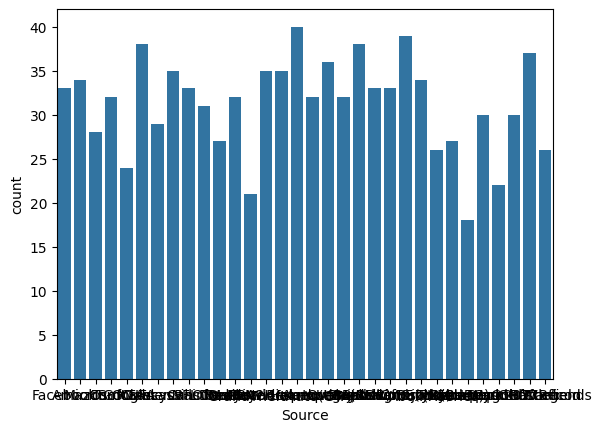

In [ ]:

sns.countplot(x=df['Source'],data=df)

In [ ]:
df['Target'].value_counts()

Target
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

<Axes: xlabel='ID', ylabel='Target'>

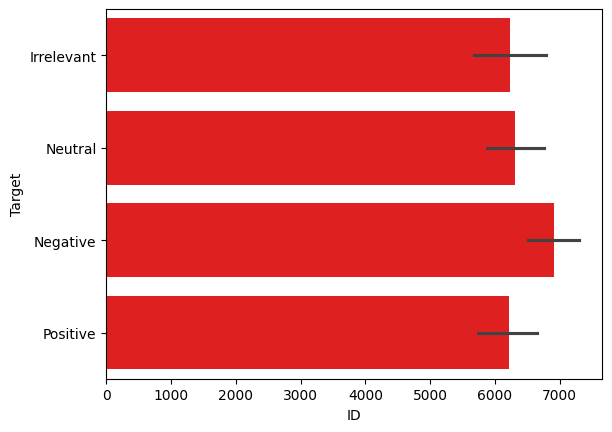

In [ ]:
sns.barplot(x='ID',y='Target',data=df,color='r')

<Axes: xlabel='Target', ylabel='count'>

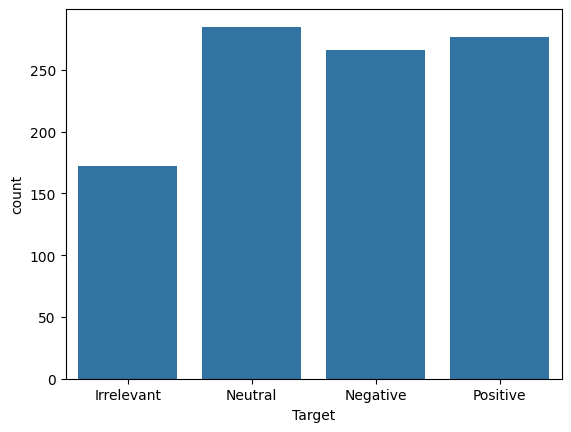

In [ ]:
sns.countplot(x='Target',data=df)

In [ ]:
df=df[df['Target']!='Irrelevant']
df

,ID,Source,Target,Review
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.reset_index(drop=True,inplace=True)
df

,ID,Source,Target,Review
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.drop(['ID','Source'],axis=1,inplace=True)
df

,Target,Review
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so it’s time to drink wine n play...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df

,Target,Review
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so it’s time to drink wine n play...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
# Positive 1
# Negetive -1
# Neutral 0

df['Target']=df['Target'].map({'Positive':1,'Negative':-1,'Neutral':0})
df

,Target,Review
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so it’s time to drink wine n play...
826,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
Review=df.Review

[ ]
Review=df.Review
Review
0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...

Review

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so it’s time to drink wine n play...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: Review, Length: 828, dtype: object

In [ ]:
Review=Review.str.replace("[^a-zA-Z0-9 ]","",regex=True)
Review

0      BBC News  Amazon boss Jeff Bezos rejects claim...
1      Microsoft Why do I pay for WORD when it functi...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp Ive had Madeleine McCann in my cella...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so its time to drink wine n play ...
826      Bought a fraction of Microsoft today Small wins
827    Johnson  Johnson to stop selling talc baby pow...
Name: Review, Length: 828, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')


In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()

In [ ]:
Review=Review.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda token:" ".join(token))
Review

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi do i pay for word when it functi...
2      csgo matchmak is so full of closet hack it a t...
3      now the presid is slap american in the face th...
4      hi eahelp ive had madelein mccann in my cellar...
                             ...                        
823    pleas explain how this is possibl how can they...
824    good on soni as much as i want to see the new ...
825    today suck so it time to drink wine n play bor...
826       bought a fraction of microsoft today small win
827    johnson johnson to stop sell talc babi powder ...
Name: Review, Length: 828, dtype: object

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw=stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
Review=Review.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda token:" ".join(token))
Review

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      hi eahelp ive madelein mccann cellar past 13 y...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine n play borderland s...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder us ...
Name: Review, Length: 828, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
data=vectorizer.fit_transform(Review)
print(data)

  (0, 693)	0.30444931436471556
  (0, 1146)	0.30444931436471556
  (0, 1277)	0.28688245905967213
  (0, 2195)	0.15709177095900126
  (0, 447)	0.2647508387565712
  (0, 1010)	0.20257552033302081
  (0, 949)	0.2647508387565712
  (0, 3054)	0.30444931436471556
  (0, 724)	0.30444931436471556
  (0, 2049)	0.28688245905967213
  (0, 782)	0.27441857686720666
  (0, 520)	0.18299317622979333
  (0, 2479)	0.23928486625711995
  (0, 692)	0.30444931436471556
  (1, 941)	0.4052090854499021
  (1, 3175)	0.4052090854499021
  (1, 2852)	0.3818283483730563
  (1, 1554)	0.4052090854499021
  (1, 4002)	0.36523945141691455
  (1, 2649)	0.31240246924634235
  (1, 3956)	0.26191944627409375
  (1, 2351)	0.24905209813650908
  (2, 1573)	0.17373491154744566
  (2, 642)	0.3681272347249391
  (2, 3736)	0.3681272347249391
  :	:
  (825, 3686)	0.25417047047308006
  (825, 780)	0.22986146346935857
  (825, 1142)	0.2316657281585646
  (825, 3675)	0.21728068459333452
  (825, 3519)	0.288330390748388
  (825, 2821)	0.17198718719403353
  (826, 152

In [ ]:
type(data)

scipy.sparse._csr.csr_matrix

In [ ]:
x=data.toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x.shape

(828, 4096)

In [ ]:
y=df['Target']
y

0      0
1     -1
2     -1
3      0
4     -1
      ..
823   -1
824    1
825    1
826    1
827    0
Name: Target, Length: 828, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

KNeighborsClassifier()
              precision    recall  f1-score   support

          -1       0.39      0.84      0.53        74
           0       0.63      0.35      0.45        91
           1       0.68      0.31      0.43        84

    accuracy                           0.48       249
   macro avg       0.57      0.50      0.47       249
weighted avg       0.58      0.48      0.47       249

Negative
________________________________________________________________________________________________________________________________________________________________________________________________________
RandomForestClassifier(criterion='entropy', random_state=1)
              precision    recall  f1-score   support

          -1       0.39      0.80      0.52        74
           0       0.55      0.29      0.38        91
           1       0.68      0.40      0.51        84

    accuracy                           0.48       249
   macro avg       0.54      0.50      0.47       249


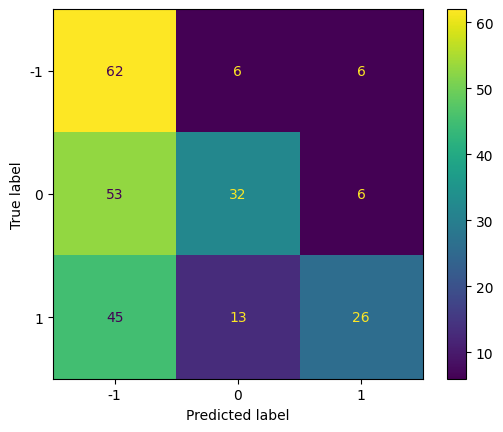

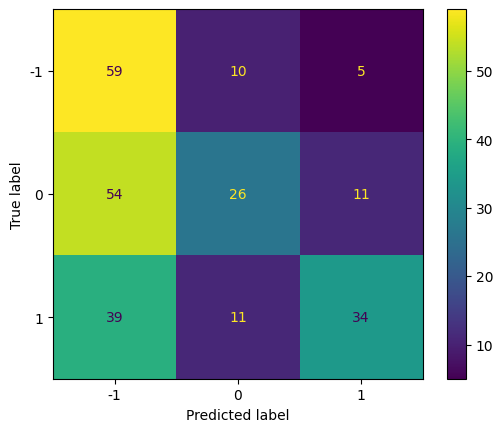

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
# from xgboost import XGBClassifier

# dec=DecisionTreeClassifier()
knn=KNeighborsClassifier()
# sv=SVC(kernel='linear')
# nb=GaussianNB()
rf=RandomForestClassifier(random_state=1,criterion='entropy')  #max_leaf_nodes=15
# ab=AdaBoostClassifier(random_state=1)
# gb=GradientBoostingClassifier(random_state=1)
# xg=XGBClassifier(random_state=1)


from sklearn.metrics import classification_report,ConfusionMatrixDisplay
models=[knn,rf]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  y_new=model.predict(vectorizer.transform(['csgo matchmak full closet hack truli aw game']))
  if y_new==-1:
    print("Negative")
  elif y_new==0:
    print("Neutral")
  else:
    print("Positive")
  print('_'*200)